<a href="https://colab.research.google.com/github/jyotirmoy23/Capstone-Project-1/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
df=pd.read_csv('/content/drive/MyDrive/Copy of Hotel Bookings.csv')

In [42]:
# See the first five rows
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [43]:
# Basic Gist of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [44]:
# The following can be read from initial columns
#Offline vs online bookings
# Type of customer staying and preferred 
# 4 float columns, 16 columns with integer values and 12 coulmns with objects items


In [45]:
# Lets calculate the total NaN values in the dataset.
total_NaN = df.isnull().sum().sort_values(ascending=False)
print(total_NaN)

company                           112593
agent                              16340
country                              488
children                               4
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
is_canceled                            0
market_segment                         0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
babies                                 0
meal                                   0
reservation_status_date                0
distribution_channel                   0
reservation_status                     0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes 

In [46]:
# The column company has highest null values. Since this will lead to incorrect assumptions we will drop this column.
# we also drop agent

In [47]:
new_df = df.drop(['company', 'agent'],axis = 1)

In [48]:
new_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [49]:
# Now we check if there are any rows containing zero values in all four columns of adults,children,babies and not cancelled.



new_df[(new_df.adults+new_df.babies+new_df.children+new_df.is_canceled)==0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


In [50]:
#  We can see that there are 155 rows which have zero value in adults,babies,children and not cancelled. 
# This means that no one booked  any  rooms though the booking were also not cancelled. We will remove these rows for our initial analysis.


In [51]:
new_df_1 = new_df.drop(new_df[(new_df.adults+new_df.babies+new_df.children+new_df.is_canceled)==0].index)

In [52]:
(new_df_1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [53]:
new_df_1[(new_df_1.is_canceled)==1 ].count()

hotel                             44224
is_canceled                       44224
lead_time                         44224
arrival_date_year                 44224
arrival_date_month                44224
arrival_date_week_number          44224
arrival_date_day_of_month         44224
stays_in_weekend_nights           44224
stays_in_week_nights              44224
adults                            44224
children                          44220
babies                            44224
meal                              44224
country                           44157
market_segment                    44224
distribution_channel              44224
is_repeated_guest                 44224
previous_cancellations            44224
previous_bookings_not_canceled    44224
reserved_room_type                44224
assigned_room_type                44224
booking_changes                   44224
deposit_type                      44224
days_in_waiting_list              44224
customer_type                     44224


In [54]:
a = 44224/119235

In [55]:
print(a)

0.37089780685201496


In [56]:
# Now we find the noumber of cancelled booking and store it in a new dataframe
# For this we will drop the not cancelled bookings (==0)and get the number of cancelled bookings
df_cancelled = new_df_1.drop(new_df_1[(new_df_1.is_canceled)==0].index)
print(df_cancelled)

               hotel  is_canceled  ...  reservation_status  reservation_status_date
8       Resort Hotel            1  ...            Canceled               2015-05-06
9       Resort Hotel            1  ...            Canceled               2015-04-22
10      Resort Hotel            1  ...            Canceled               2015-06-23
27      Resort Hotel            1  ...            Canceled               2015-05-11
32      Resort Hotel            1  ...            Canceled               2015-05-29
...              ...          ...  ...                 ...                      ...
110280    City Hotel            1  ...            Canceled               2017-04-25
111355    City Hotel            1  ...            Canceled               2017-06-05
111924    City Hotel            1  ...            Canceled               2017-05-31
111925    City Hotel            1  ...             No-Show               2017-07-17
117295    City Hotel            1  ...             No-Show               201

In [57]:
counts = df_cancelled['hotel'].value_counts()
print(counts)

City Hotel      33102
Resort Hotel    11122
Name: hotel, dtype: int64


In [58]:
#Total_cancelled = 37%

City_hotel = (33102/44224)*100
Resort_hotel = (11122/44224)*100
print(City_hotel)

74.85075976845152


Text(0.5, 1.0, 'Canceled  booking of each hotel as a percent of canceled')

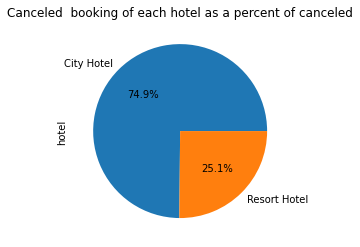

In [59]:
 counts.plot.pie(autopct="%.1f%%") 
 plt.title('Canceled  booking of each hotel as a percent of canceled')


Text(0.5, 1.0, 'Not canceled & canceled booking as percent of total booking')

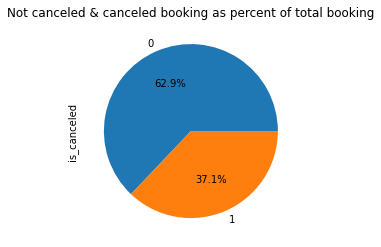

In [60]:
new_df_1['is_canceled'].value_counts().plot.pie(autopct="%.1f%%")
plt.title('Not canceled & canceled booking as percent of total booking')

From the above it is clear that 37 % bookings were cancelled.
Out of which 74.9% were city hotel with highest percentage of bookings canceled and 25.1% were Resort Hotel.

In [61]:
# Finding the number of confirmed booking
df_not_cancelled = new_df_1.drop(new_df_1[(new_df_1.is_canceled)==1].index)
df_not_cancelled


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


Text(0.5, 1.0, 'Confirmed booking of each hotel')

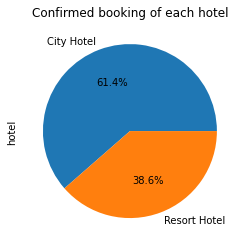

In [62]:
df_not_cancelled['hotel'].value_counts().plot.pie(autopct="%.1f%%")
plt.title('Confirmed booking of each hotel')

**From the above we can infer that 61.4 % were confirmed city booking followed by resort hotel with 38.6 %**


we now use only those bookings which were not canceled for  further analysis


Text(0.5, 1.0, 'year wise breakup of booking')

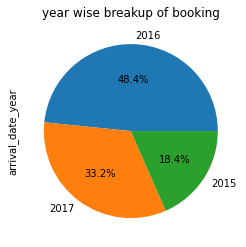

In [63]:
# Find the number of bookings made for every year.
df_not_cancelled['arrival_date_year'].value_counts().plot.pie(autopct="%.1f%%")
plt.title('year wise breakup of booking')

In [64]:
gra = df_not_cancelled['hotel'].groupby([df_not_cancelled.arrival_date_year, df_not_cancelled.arrival_date_month]).agg('count')




```
# This is formatted as code
```

From the above data we can see that highest booking was made in month of October 2016

In [65]:
month_with_most_booking =df_not_cancelled['arrival_date_month'].value_counts()
month_with_most_booking

August       8624
July         7907
May          7103
October      6901
March        6620
April        6560
June         6395
September    6385
February     5359
November     4651
December     4391
January      4115
Name: arrival_date_month, dtype: int64

August and July has more number of aggregrate bookings for the three years.

Text(0, 0.5, 'Number of counting')

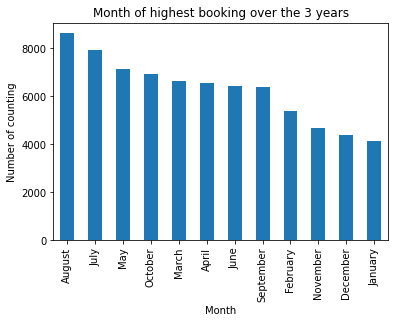

In [66]:
Month_with_most_booking=df_not_cancelled['arrival_date_month'].value_counts().plot.bar()

plt.title('Month of highest booking over the 3 years')
plt.xlabel('Month')
plt.ylabel('Number of counting')

In [67]:
Year_with_most_booking =df_not_cancelled['arrival_date_year'].value_counts()
Year_with_most_booking

2016    36299
2017    24886
2015    13826
Name: arrival_date_year, dtype: int64

We see that 2016 has the highest number of bookings


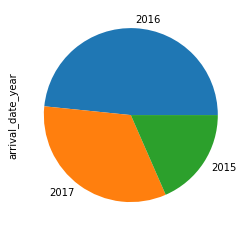

In [68]:
Year_with_most_booking.plot.pie()

In [69]:
# Most numbers of booking from which country
country =df_not_cancelled['country'].value_counts().nlargest(10)
print(country)

PRT    20977
GBR     9668
FRA     8468
ESP     6383
DEU     6067
IRL     2542
ITA     2428
BEL     1868
NLD     1716
USA     1592
Name: country, dtype: int64


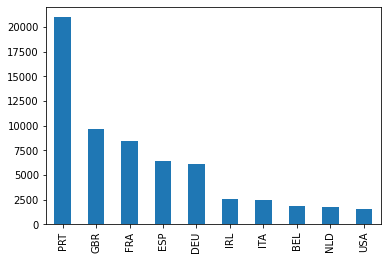

In [70]:
country.plot.bar()

From the above we can see that PRT is the country from which highest not canceled bookings i.e 20977 were made followed by GBR and FRA with 9668 and 8468 respectively

In [71]:
df_not_cancelled['is_repeated_guest'].value_counts()

0    71806
1     3205
Name: is_repeated_guest, dtype: int64

# We see that only 3205 were repeated guest whereas 71806 were new customer. So the hotels can provide scheme to get more repeated customers.

Text(0, 0.5, 'Count')

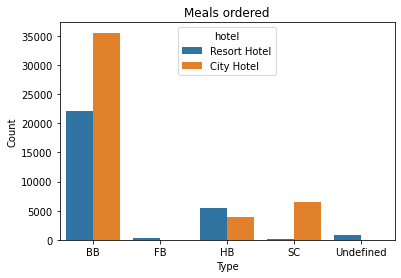

In [72]:
# Breakup of meals ordered in hotel
sns.countplot(x='meal', hue='hotel',  data=df_not_cancelled)
plt.title('Meals ordered')
plt.xlabel('Type')
plt.ylabel('Count')

In [73]:
df_not_cancelled['meal'].value_counts()

BB           57730
HB            9475
SC            6603
Undefined      883
FB             320
Name: meal, dtype: int64

We can conclude that breakfast is the most prefered meal type in both the hotels whereas other meals are not popular. So they can provide incentive to make up more sales in other meal segments to ramp up profit.

In [74]:
# Most Prefered 
df_not_cancelled['distribution_channel'].value_counts()

TA/TO        57614
Direct       12056
Corporate     5184
GDS            156
Undefined        1
Name: distribution_channel, dtype: int64

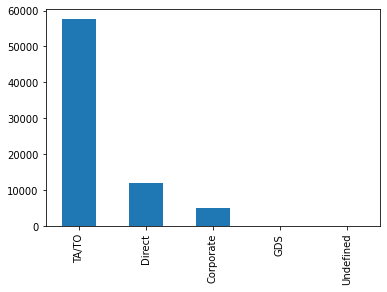

In [75]:
df_not_cancelled['distribution_channel'].value_counts().plot.bar()

# From the above we can conclude that Travel agent and Travel operators make the most number of successful bookings and hence they have a sinificant role to play in bookings.

In [76]:
df_not_cancelled['customer_type'].value_counts()

Transient          52982
Transient-Party    18703
Contract            2810
Group                516
Name: customer_type, dtype: int64

In [84]:
avg_price_resort_hotel=df_not_cancelled.loc[df_not_cancelled.hotel =='Resort Hotel'][['hotel', 'adr']]
print(avg_price_resort_hotel)


              hotel     adr
0      Resort Hotel    0.00
1      Resort Hotel    0.00
2      Resort Hotel   75.00
3      Resort Hotel   75.00
4      Resort Hotel   98.00
...             ...     ...
40055  Resort Hotel   89.75
40056  Resort Hotel  202.27
40057  Resort Hotel  153.57
40058  Resort Hotel  112.80
40059  Resort Hotel   99.06

[28927 rows x 2 columns]


In [85]:
avg_price_resort_hotel.describe()


,adr
count,28927.000000
mean,90.822527
std,59.306929
min,-6.380000
25%,48.000000
50%,72.000000
75%,118.220000
max,508.000000


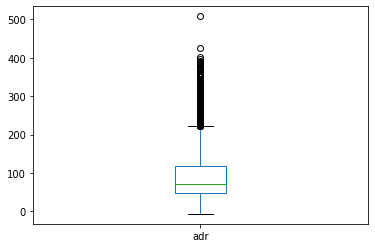

In [86]:
avg_price_resort_hotel.plot.box()

From the above we can conclude that the mean is 90.822 whereas standard deviation is 59.31. Also loolking at box plot we can confirm that outliers is present in the the data. So now we will filter it to get a accurate depiction of average daily rate.

In [101]:
Q1 = avg_price_resort_hotel.quantile(0.25)
Q3 = avg_price_resort_hotel.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
Lower_data =Q1-1.5*(IQR)
Upper_data = Q3+1.5*(IQR)




SyntaxError: ignored